### exercise 0 introduction to data visualization 

In [1]:
import pandas as pd

In [2]:
d = pd.read_csv(r'C:\Users\Chijun Zhang\Documents\jupyter\machine learning exercise\datasets\auto-mpg.csv')
d.head()

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [3]:
d.origin = pd.Categorical(d.origin.replace({1: 'america', 2: 'europe', 3: 'asia'}))
d.head()

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,america
1,15.0,8,350.0,165.0,3693.0,11.5,70,america
2,18.0,8,318.0,150.0,3436.0,11.0,70,america
3,16.0,8,304.0,150.0,3433.0,12.0,70,america
4,17.0,8,302.0,140.0,3449.0,10.5,70,america


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_style('white')
sns.set_palette('pastel')
plt.rcParams['figure.figsize'] = (8,6)

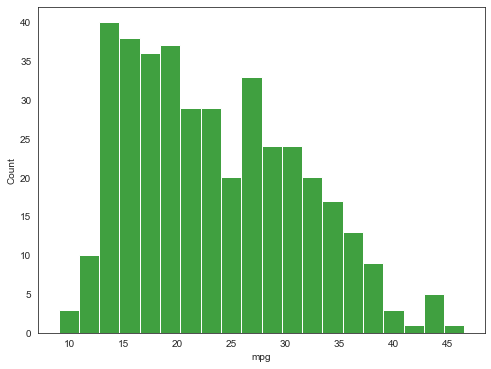

In [6]:
sns.histplot(d.mpg, kde=False, bins=20, color='green');

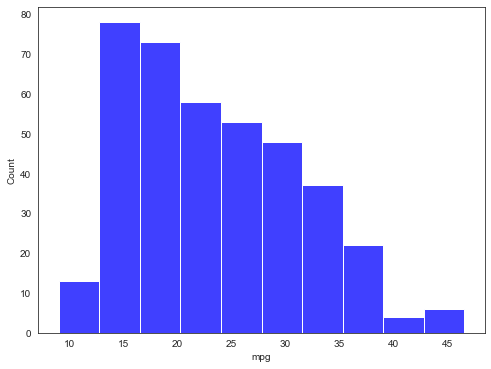

In [7]:
sns.histplot(d.mpg, kde=False, bins=10, color='blue');

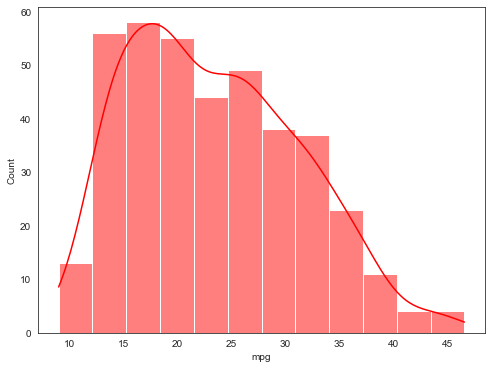

In [8]:
sns.histplot(d.mpg, kde=True, color='red');

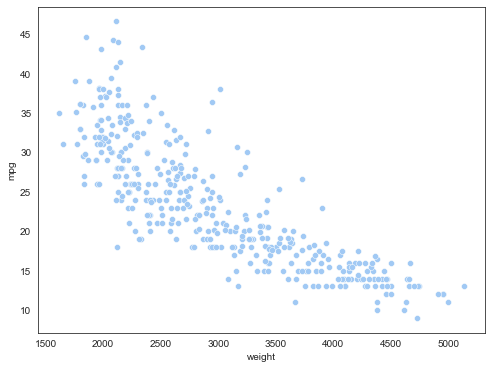

In [9]:
sns.scatterplot(x='weight', y='mpg', data=d);

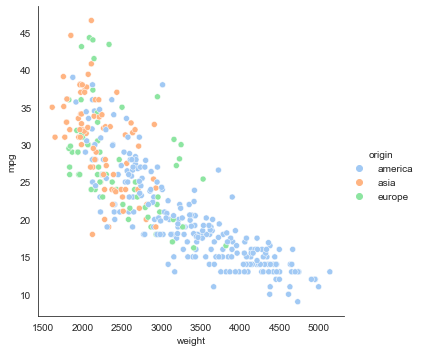

In [10]:
sns.relplot(x='weight', y='mpg', hue='origin', data=d);

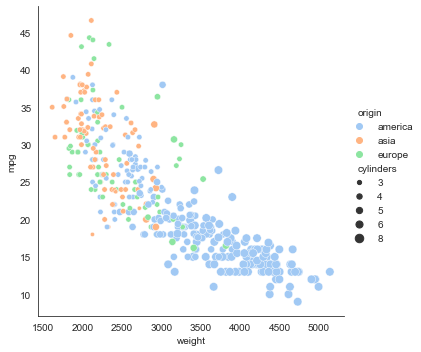

In [11]:
sns.relplot(x='weight', y='mpg', hue='origin', size='cylinders', data=d);

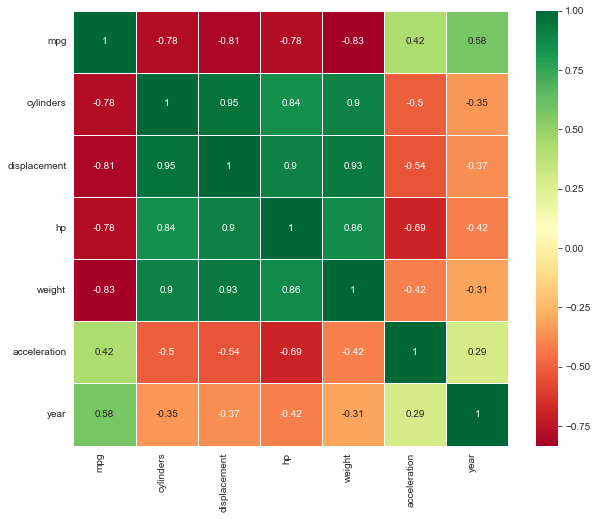

In [12]:
corr = d.corr()
fig, ax = plt.subplots(figsize=(10,8))
h = sns.heatmap(corr, cmap=plt.cm.RdYlGn, annot=True, linewidths=1, square=True, ax=ax)
ax.set_ylim(len(corr),0) # Due to a bug in Matplotlib 3.1.1
h.set_xticklabels(h.get_xticklabels(), rotation=90, ha='right')
h.set_yticklabels(h.get_yticklabels(), rotation=0, ha='right');

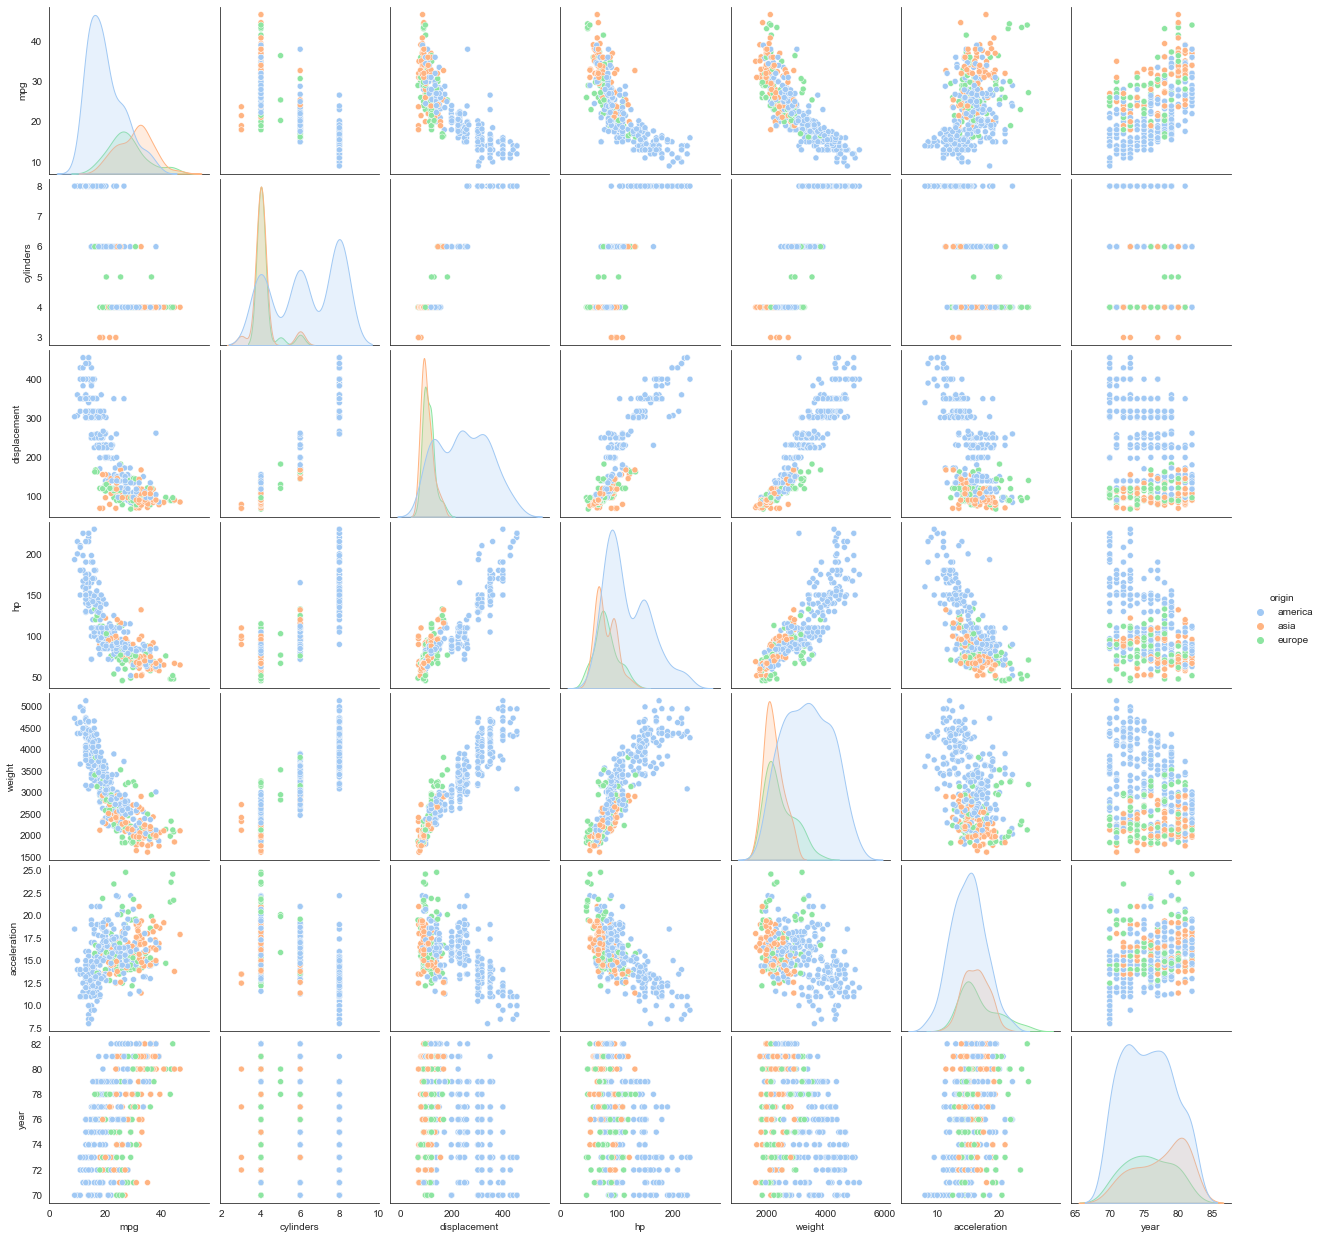

In [13]:
sns.pairplot(d, hue='origin');

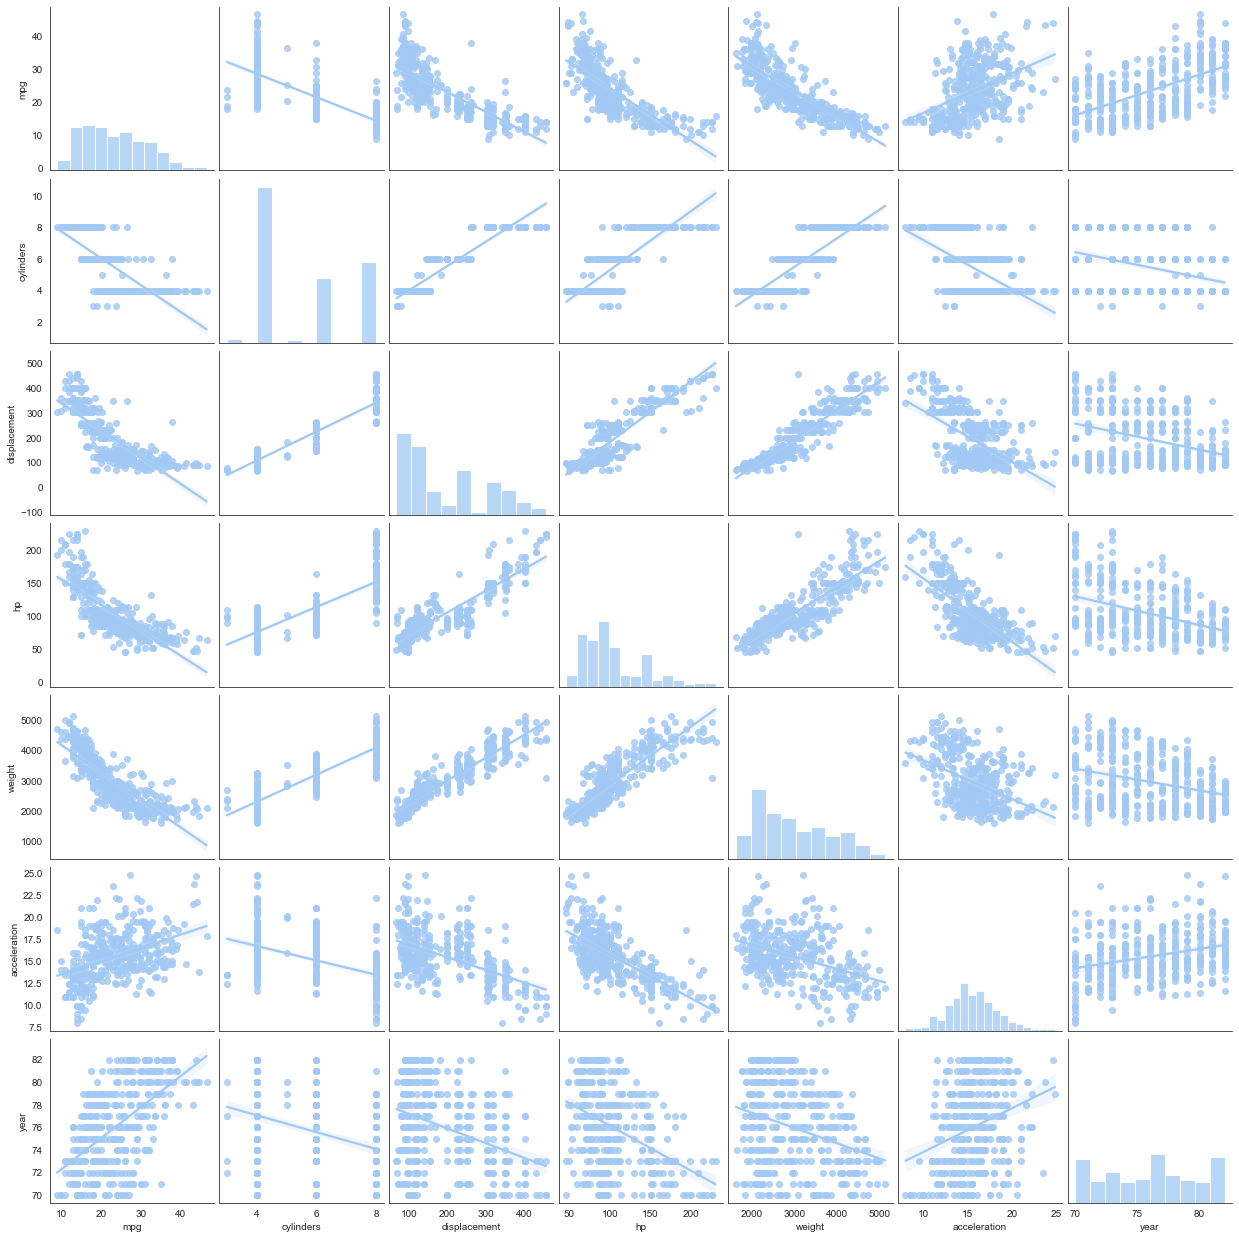

In [14]:
#change the kind og the plot to 'reg' ('regression') to also plot the regression lines
#change the diag_kind to 'hist' to plot the histogram instead of the kernel density estimate on the diagonal
sns.pairplot(d, kind='reg', diag_kind='hist');

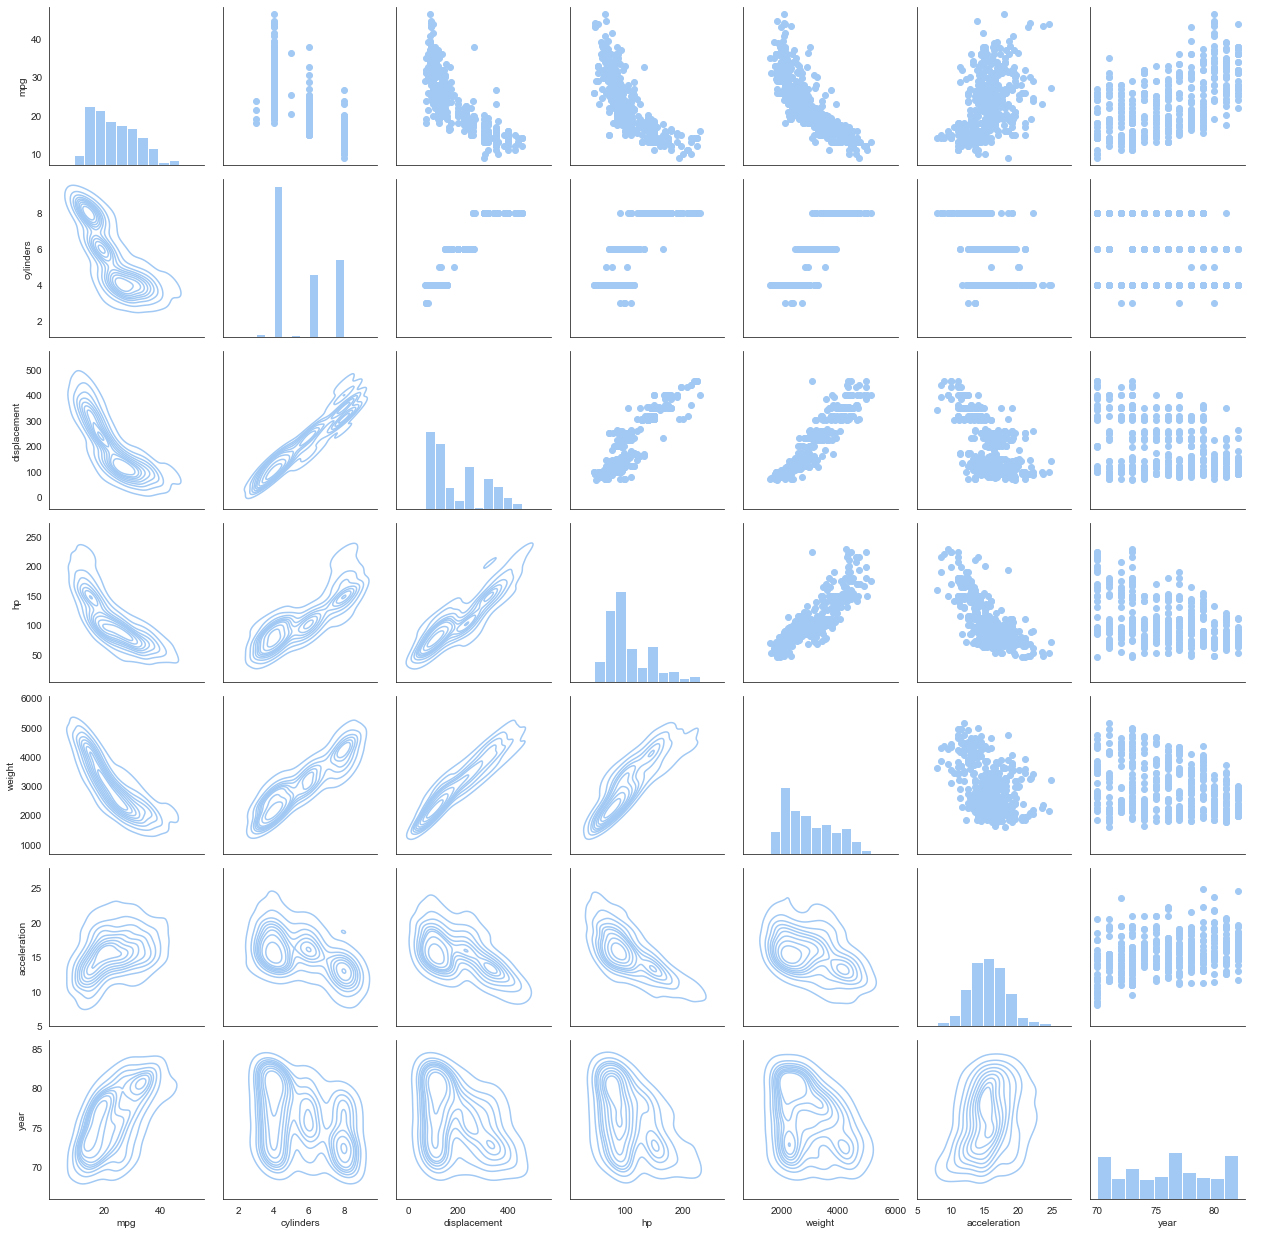

In [15]:
pg = sns.PairGrid(d)
pg = pg.map_diag(plt.hist) #plot the histogram on the diagonal
pg = pg.map_upper(plt.scatter) #above the diagonal plot the scatterplots
pg = pg.map_lower(sns.kdeplot) #below the diagonal plot the kernel density estimates
pg = pg.add_legend();